In [115]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [319]:
 #sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [324]:
df_confirmed_cases=pd.read_csv('../raw_data/confirmed_cases.csv')
df_death=pd.read_csv('../raw_data/confirmed_deaths.csv')
df_school_closing=pd.read_csv('../raw_data/c1m_school_closing.csv')
df_workplace_closing=pd.read_csv('../raw_data/c2m_workplace_closing.csv')
df_cancel_public_event=pd.read_csv('../raw_data/c3m_cancel_public_events.csv')
df_restriction_on_gathering=pd.read_csv('../raw_data/c4m_restrictions_on_gatherings.csv')
df_stay_at_home=pd.read_csv('../raw_data/c6m_stay_at_home_requirements.csv')
df_international_travel=pd.read_csv('../raw_data/c6m_stay_at_home_requirements.csv')
df_goverment_response=pd.read_csv('../raw_data/government_response_index_avg.csv')
df_facial_covering=pd.read_csv('../raw_data/h6m_facial_coverings.csv')
df_vacination_policy=pd.read_csv('../raw_data/h7_vaccination_policy.csv')
df_vacination=pd.read_csv('../raw_data/vaccination.csv')
df_economic_support=pd.read_csv('../raw_data/economic_support_index.csv')

df_confirmed_cases.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,194163.0,194163.0,194163.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330193.0,330193.0,330193.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [325]:
np.where(df_confirmed_cases[df_confirmed_cases["country_code"]=='USA'].isna())[0] 

array([ 0,  0,  0, ..., 51, 51, 51])

In [330]:
def data_cleaning_all_countries(name_data_table):
    trans_table=df_confirmed_cases.groupby('country_code').sum().T.drop('Unnamed: 0')
    trans_table.index = pd.to_datetime(trans_table.index)
    return trans_table
    

data_cleaning_all_countries(df_confirmed_cases)

country_code,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,42848.0,193520.0,102636.0,329862.0,46027.0,1016324.0,9678225.0,20121588.0,4966009.0,814435.0,...,188434370.0,243830.0,542508.0,22771.0,11415907.0,11836.0,11926.0,4012485.0,332822.0,256744.0
2022-09-03,42848.0,193912.0,102636.0,330062.0,46027.0,1016745.0,9678225.0,20133458.0,4966009.0,815047.0,...,188451479.0,243830.0,542874.0,22771.0,11417503.0,11836.0,11926.0,4012653.0,332822.0,256755.0
2022-09-04,42848.0,194163.0,102636.0,330193.0,46027.0,1017145.0,9689861.0,20145774.0,4966009.0,815523.0,...,188462003.0,243830.0,542874.0,22771.0,11418894.0,11836.0,11931.0,4012812.0,333074.0,256763.0
2022-09-05,42848.0,194163.0,102636.0,330193.0,46027.0,1017145.0,9689861.0,19149335.0,4966009.0,815523.0,...,103664632.0,243830.0,542874.0,22771.0,11418894.0,11836.0,11931.0,4012812.0,333074.0,256763.0


In [331]:
def data_cleaning_all_indicator(name_data_table):
    trans_table=name_data_table.groupby('country_code').sum().round(decimals = 0).T.drop('Unnamed: 0')
    trans_table.index = pd.to_datetime( trans_table.index)
    return trans_table
data_cleaning_all_indicator(df_school_closing)['USA'][900:1000]

2022-06-19    20.0
2022-06-20    20.0
2022-06-21    20.0
2022-06-22    20.0
2022-06-23    20.0
              ... 
2022-09-02     1.0
2022-09-03     0.0
2022-09-04     0.0
2022-09-05     0.0
2022-09-06     0.0
Name: USA, Length: 80, dtype: float64

In [332]:
data_confirmed_cases_USA=data_cleaning_all_countries(df_confirmed_cases)['USA']
data_school_closing_USA=data_cleaning_all_countries(df_school_closing)['USA']
df_death_USA=data_cleaning_all_countries(df_death)['USA']
#df_vacination_policy
#df_goverment_response
#df_cancel_public_event
data_confirmed_cases_USA.tail()


2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    188462003.0
2022-09-05    103664632.0
2022-09-06    103664632.0
Name: USA, dtype: float64

In [333]:
data_school_closing_USA.tail()

2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    188462003.0
2022-09-05    103664632.0
2022-09-06    103664632.0
Name: USA, dtype: float64

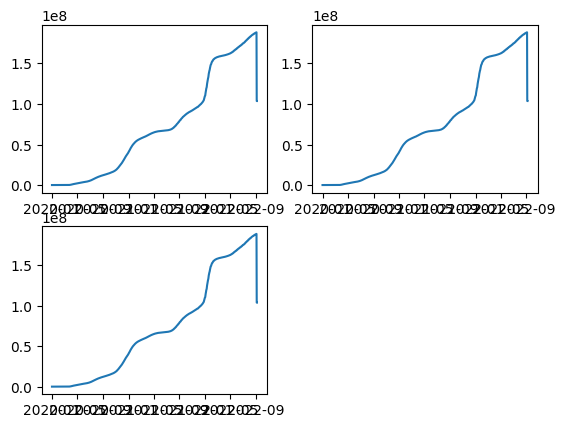

In [334]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(data_confirmed_cases_USA,label='confirmed cases')

plt.subplot(2,2,2)
plt.plot(data_school_closing_USA ,label='school_closing')

plt.subplot(2, 2, 3)
plt.plot(df_death_USA,label='death_rate')


plt.show()

In [335]:
data_confirmed_cases_USA.tail()

2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    188462003.0
2022-09-05    103664632.0
2022-09-06    103664632.0
Name: USA, dtype: float64

In [336]:
data_confirmed_cases_USA_days = pd.concat([data_confirmed_cases_USA,data_confirmed_cases_USA.shift(periods=2)], axis=1)

In [337]:
data_confirmed_cases_USA_days = pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=3)], axis=1)

In [338]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=4)], axis=1)

In [339]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=5)], axis=1)

In [340]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=6)], axis=1)

In [341]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=7)], axis=1)

In [342]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=8)], axis=1)

In [343]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=9)], axis=1)

In [344]:
data_confirmed_cases_USA_days=pd.concat([data_confirmed_cases_USA_days,data_confirmed_cases_USA.shift(periods=10)], axis=1)

In [345]:
data_confirmed_cases_USA_days.columns = ['confirmed_case','day-2','day-3','day-4','day-5','day-6','day-7','day-8','day-9','day-10']

In [346]:
data_confirmed_cases_USA_days.tail(10)

,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2022-08-28,187387981.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0,186076465.0,186056518.0,185903503.0
2022-08-29,187590614.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0,186076465.0,186056518.0
2022-08-30,187732965.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0,186076465.0
2022-08-31,188038152.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0,186092600.0
2022-09-01,188271143.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0,186347473.0
2022-09-02,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,103664632.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0
2022-09-06,103664632.0,188462003.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0


In [347]:
data_confirmed_cases_USA_days.head(20)

,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [348]:
country = 'USA'

# INDEX FEATURES
data_usa=data_confirmed_cases_USA_days
#data_USA = pd.concat([data_confirmed_cases_USA_days,data_cleaning_all_countries(df_school_closing)[country]])
#country_features.index.name = country
#data_USA.columns = ['school_closing']
data_usa.insert(0, 'school_closing', data_cleaning_all_indicator(df_school_closing)[country])


#country_features['Containment_and_health'] = df_health[[country]]
#country_features['Stringency'] = df_strigency[[country]]
#country_features['Economics_sup'] = df_economic[[country]]



In [349]:
data_usa.insert(1, 'goverment_response', data_cleaning_all_countries(df_goverment_response)[country])

In [350]:
data_usa

,school_closing,goverment_response,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,1.0,188434370.0,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,0.0,188451479.0,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,188462003.0,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,103664632.0,103664632.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0


In [351]:
data_usa.insert(2, 'cancel_public_event', data_cleaning_all_indicator(df_cancel_public_event)[country])

In [352]:
data_usa.insert(3,'workplace_closing', data_cleaning_all_indicator(df_workplace_closing)[country])

In [353]:
data_usa.insert(4,'stay_at_home', data_cleaning_all_indicator(df_stay_at_home)[country])
data_usa.insert(5,'international_travel', data_cleaning_all_indicator(df_international_travel)[country])
data_usa.insert(6,'facial_covering', data_cleaning_all_indicator(df_facial_covering)[country])

In [354]:
data_usa


,school_closing,goverment_response,cancel_public_event,workplace_closing,stay_at_home,international_travel,facial_covering,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,1.0,188434370.0,0.0,0.0,0.0,0.0,2.0,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,0.0,188451479.0,0.0,0.0,0.0,0.0,0.0,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,188462003.0,0.0,0.0,0.0,0.0,0.0,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,103664632.0,0.0,0.0,0.0,0.0,0.0,103664632.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0


In [355]:
data_usa.isna().sum()

school_closing           0
goverment_response       0
cancel_public_event      1
workplace_closing        0
stay_at_home             0
international_travel     0
facial_covering          0
confirmed_case           0
day-2                    2
day-3                    3
day-4                    4
day-5                    5
day-6                    6
day-7                    7
day-8                    8
day-9                    9
day-10                  10
dtype: int64

In [356]:
data_usa[50:200]

,school_closing,goverment_response,cancel_public_event,workplace_closing,stay_at_home,international_travel,facial_covering,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-02-20,0.0,30.0,0.0,0.0,1.0,1.0,0.0,30.0,30.0,29.0,28.0,28.0,28.0,28.0,26.0,26.0,24.0
2020-02-21,0.0,32.0,0.0,0.0,1.0,1.0,0.0,32.0,30.0,30.0,29.0,28.0,28.0,28.0,28.0,26.0,26.0
2020-02-22,0.0,32.0,0.0,0.0,1.0,1.0,0.0,32.0,30.0,30.0,30.0,29.0,28.0,28.0,28.0,28.0,26.0
2020-02-23,0.0,32.0,0.0,0.0,1.0,1.0,0.0,32.0,32.0,30.0,30.0,30.0,29.0,28.0,28.0,28.0,28.0
2020-02-24,0.0,33.0,0.0,0.0,1.0,1.0,0.0,33.0,32.0,32.0,30.0,30.0,30.0,29.0,28.0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,153.0,6879373.0,78.0,77.0,58.0,58.0,133.0,6879373.0,6628761.0,6508415.0,6387541.0,6250125.0,6130567.0,6009635.0,5894767.0,5807794.0,5699805.0
2020-07-15,153.0,7011979.0,78.0,77.0,57.0,57.0,133.0,7011979.0,6747882.0,6628761.0,6508415.0,6387541.0,6250125.0,6130567.0,6009635.0,5894767.0,5807794.0
2020-07-16,153.0,7153526.0,78.0,78.0,57.0,57.0,134.0,7153526.0,6879373.0,6747882.0,6628761.0,6508415.0,6387541.0,6250125.0,6130567.0,6009635.0,5894767.0
2020-07-17,153.0,7286046.0,79.0,78.0,57.0,57.0,136.0,7286046.0,7011979.0,6879373.0,6747882.0,6628761.0,6508415.0,6387541.0,6250125.0,6130567.0,6009635.0


In [357]:
X=data_usa.drop(columns=['confirmed_case'])

In [358]:
#target?confirmed cases or death cases
#target?absolute number or cases per day


#Nan before first value of covid dont want to make machine learning
#find first covid case and drop everything above that
#value nearby simple imputer
#there is function in pandas helps to replace
#target is number of cases
#mean of before and below and replace it using imputer
#check again if there is no nan
#traintest split according to time series 
#2020 2022
#df[:80]
#df[80:]

#minmaxscaler
#minscaler for y

#no need of categorical
# predict daily or cumulative sum?
#modeling
#linear regression
#base line score

#tuesday 2nd week ml

#metric mape since results in percentage





In [359]:
y=data_usa['confirmed_case']

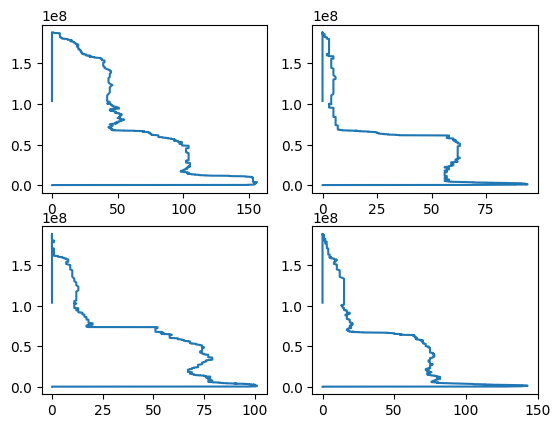

In [360]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(X['school_closing'],y,label='cases as per school closure')

plt.subplot(2, 2, 2)
plt.plot(X['international_travel'],y,label='international travel restriction')

plt.subplot(2, 2, 3)
plt.plot(X['cancel_public_event'],y,label='cases as per canceling public events')

plt.subplot(2, 2, 4)
plt.plot(X['workplace_closing'],y,label='cases as per workplace_closing')



plt.show()

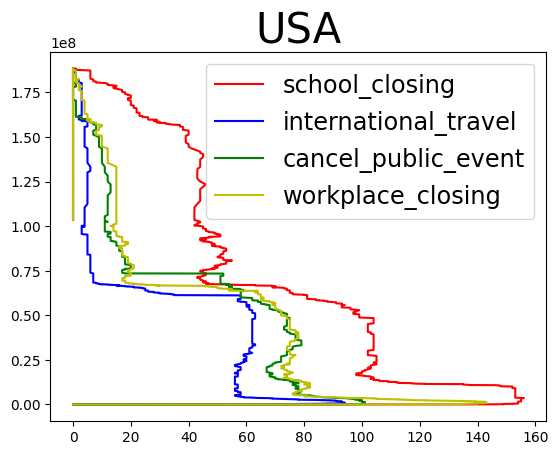

In [361]:
#x = range(country_features.shape[0])
#img = plt.figure(figsize=(25,10))
plt.plot(X['school_closing'],y, color = 'r')
plt.plot(X['international_travel'],y, color = 'b')
plt.plot(X['cancel_public_event'],y, color = 'g')
plt.plot(X['workplace_closing'],y, color = 'y')
plt.title(country, fontsize=30)
plt.legend(['school_closing','international_travel','cancel_public_event','workplace_closing'], fontsize='xx-large')

In [362]:
X.dtypes.value_counts()

float64    16
dtype: int64

In [363]:
y.dtypes

dtype('float64')

In [364]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(),
    MinMaxScaler())

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int64", "float64"])),
    remainder="drop")

preproc_baseline

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f27e59e5400>)])

In [365]:
shape_preproc_baseline = preproc_baseline.fit_transform(X).shape
shape_preproc_baseline

(980, 16)

In [366]:
pipe_baseline = make_pipeline(preproc_baseline, DecisionTreeRegressor())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f27e59e5400>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [367]:
data_usa[data_usa['confirmed_case']>0]

,school_closing,goverment_response,cancel_public_event,workplace_closing,stay_at_home,international_travel,facial_covering,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,10.0,0.0,0.0,1.0,1.0,0.0,10.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,1.0,188434370.0,0.0,0.0,0.0,0.0,2.0,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,0.0,188451479.0,0.0,0.0,0.0,0.0,0.0,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,188462003.0,0.0,0.0,0.0,0.0,0.0,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,103664632.0,0.0,0.0,0.0,0.0,0.0,103664632.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0


In [368]:
data=data_usa[~(data_usa.index < '2020-01-22')]

In [370]:
data

,school_closing,goverment_response,cancel_public_event,workplace_closing,stay_at_home,international_travel,facial_covering,confirmed_case,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
2020-01-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,10.0,0.0,0.0,1.0,1.0,0.0,10.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,1.0,188434370.0,0.0,0.0,0.0,0.0,2.0,188434370.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0,186543487.0
2022-09-03,0.0,188451479.0,0.0,0.0,0.0,0.0,0.0,188451479.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0,186843080.0
2022-09-04,0.0,188462003.0,0.0,0.0,0.0,0.0,0.0,188462003.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0,187117337.0
2022-09-05,0.0,103664632.0,0.0,0.0,0.0,0.0,0.0,103664632.0,188451479.0,188434370.0,188271143.0,188038152.0,187732965.0,187590614.0,187387981.0,187376344.0,187355949.0
